本节主要练习使用sklearn进行数据预处理

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
# 导入手写字体数据集
X, y = load_digits(return_X_y=True)

The digit in the image is 0


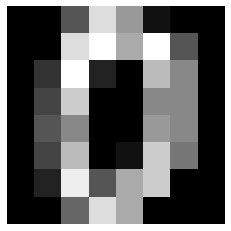

In [7]:
plt.imshow(X[0].reshape(8, 8), cmap='gray') # 完成灰度图绘制
plt.axis('off')
print('The digit in the image is {}'.format(y[0]))  # 格式化打印

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据集的类分布相同。

In [1]:
import torch

torch.randperm(10)

tensor([3, 6, 2, 5, 1, 4, 0, 8, 7, 9])

In [2]:
arr = [[36, 37, 40, 41, 42, 45, 47, 48, 68, 69],
                 [0, 2, 3, 27, 30, 31, 56, 57, 62, 77]]
len(arr)

2